# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best)“off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


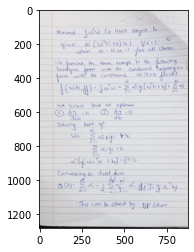

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('img1.jpeg'))
#https://drive.google.com/file/d/1cV2EXTw6YLHUAoWmpoXf67KUM8e4Lq2g/view?usp=sharing

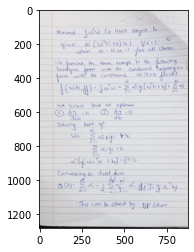

In [ ]:
plt.imshow(mpimg.imread('img2.jpeg'))
#https://drive.google.com/file/d/1mmaUUaYLTcgwlY62rJfc-UbBAVZI182j/view?usp=sharing

In [27]:
import numpy as np
import cvxpy
from cvxpy import *
import matplotlib.pyplot as plt

### Subsection 1

In [33]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

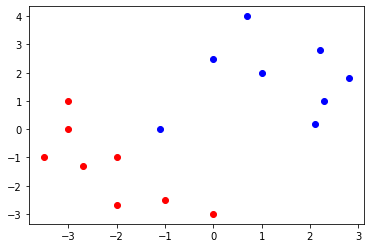

In [34]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])
plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

In [35]:
import warnings
warnings.filterwarnings("ignore")
Describe_x={"number":X.shape[0],"dimension":X.shape[1],"num_pts_class":8}
Weight,Bias = Variable((Describe_x["dimension"],1)),Variable()
obj = Minimize((norm(Weight,2))) 
constraints =[Weight.T * X[i] + Bias >= 1  for i in range(Describe_x["num_pts_class"])] + [Weight.T * y[i] + Bias <= -1 for i in range(Describe_x["number"])]
prob = Problem(obj, constraints)
prob.solve()
print("W = ",Weight.value.flatten())
print("B = ",Bias.value)

W =  [-1.6 -1.2]
B =  -2.6000000003402786


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

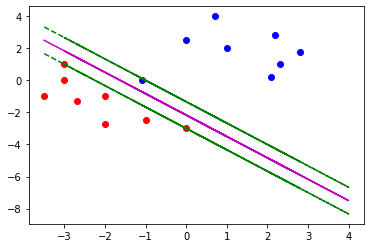

In [36]:
def plot_margin(Bias,Weight,X):
    m = (-Bias.value - Weight.value[0]*X)/Weight.value[1]
    plt.plot(X, (-Bias.value - (Weight.value[0]*X))/Weight.value[1] , 'm')
    plt.plot(X, (-Bias.value - (Weight.value[0]*X)+1)/Weight.value[1] ,'g--')
    plt.plot(X, (-Bias.value - (Weight.value[0]*X)-1)/Weight.value[1] , 'g--')
plot_margin(Bias,Weight,X)
plot_points(X, y)
plt.show()

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here**

yellow and blue points are support vectors
red point is w vector
green line is margin
purple line is boundary


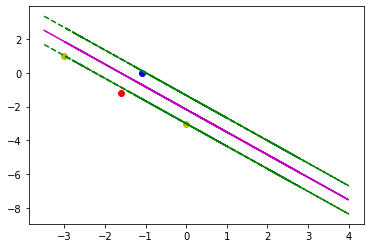

In [37]:
import math
plot_margin(Bias,Weight,X)
Redones,Blueones = [],[]
r,b=[],[]
for idx,lab in enumerate(y):
  if lab==1:
    dist=math.sqrt((((-Bias.value - (Weight.value[0]*X[idx][0])+1)/Weight.value[1])[0]-X[idx][1])**2)
    if dist<0.2:
      Redones.append(X[idx])
  elif lab==-1:
    dist=math.sqrt((((-Bias.value - (Weight.value[0]*X[idx][0])-1)/Weight.value[1])[0]-X[idx][1])**2)
    if dist<0.2:
      Blueones.append(X[idx])

#plt.scatter(r[:,0],r[:,1],c='y')
r=np.array(Redones)
b=np.array(Blueones)
plt.scatter(r[:, 0], r[:, 1],c ='y')
plt.scatter(b[:,0],b[:,1],c='b')
plt.scatter(Weight.value[0],Weight.value[1],c='r')
print("yellow and blue points are support vectors")
print("red point is w vector")
print("green line is margin")
print("purple line is boundary")
plt.show()

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

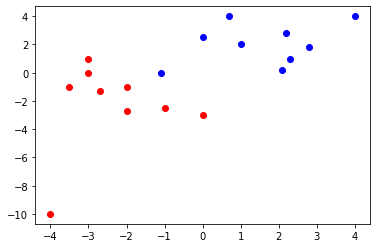

In [38]:
X = np.array([[-3.5, -1], [-3, 0], [-4,-10], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8],[4,4]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1,-1])
plot_points(X, y)
plt.show()

W =  [-1.6 -1.2]
B =  -2.600000000516176


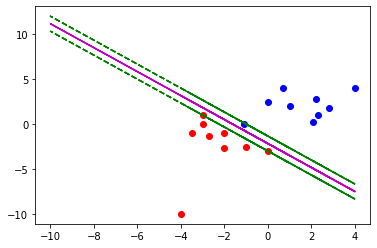

In [39]:
Describe_x={"number":X.shape[0],"dimension":X.shape[1],"num_pts_class":9}
Weight,Bias = Variable((Describe_x["dimension"],1)),Variable()
obj = Minimize((norm(Weight,2))) 
constraints =[Weight.T * X[i] + Bias >= 1  for i in range(Describe_x["num_pts_class"])] + [Weight.T * y[i] + Bias <= -1 for i in range(Describe_x["number"])]
prob = Problem(obj, constraints)
prob.solve()
print("W = ",Weight.value.flatten())
print("B = ",Bias.value)
plot_margin(Bias,Weight,X)
plot_points(X, y)
plt.show()

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

[-0.22506809 -0.19858949] [2.43056595e-10 3.11123533e-01 7.57634790e-11 5.09713022e-01
 1.20477623e-01 3.37602132e-01 1.16143710e-10 2.64785985e-01
 3.90559328e-01 1.26124710e+00 5.17198481e-01 3.91425138e-01
 6.17665864e-02 5.01311323e-01 2.97426114e-01 2.60204787e-02
 7.83376983e-11 7.56912104e-11] 0.013672204273901692


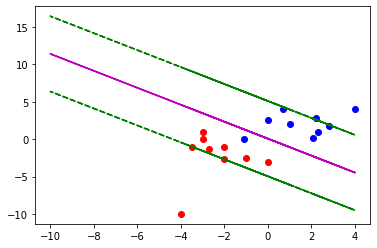

In [41]:
# Write your code here for C= 0.01
def soft_margine(X,y,c):
  d = 2
  m,n=X.shape
  b,w,sv=Variable(),Variable(d),Variable(m)

  obj = Minimize(0.5*(norm(w,2))**2 + c*sum(sv))

  constraints=[y[i]*(w.T * X[i] + b) >= 1-sv[i]  for i in range(m)] + [sv[i]>=0 for i in range(m) ]

  prob = Problem(obj, constraints)
  prob.solve()
  print(w.value,sv.value,b.value)
  return w,sv,b
w,sv,b=soft_margine(X,y,0.01)
plot_margin(b,w,X)
plot_points(X, y)
plt.show()

[-0.38493724 -0.35146444] [1.51147980e-11 1.51824022e-11 2.09130108e-11 3.17991632e-01
 1.23146269e-11 3.83726194e-11 1.23323518e-11 1.63907443e-11
 6.69456064e-02 1.30209205e+00 3.16164010e-11 2.06017444e-11
 1.46835143e-11 1.86524191e-10 1.41625952e-11 1.74590368e-11
 1.90970054e-11 2.12874713e-11] -0.1213389120189891


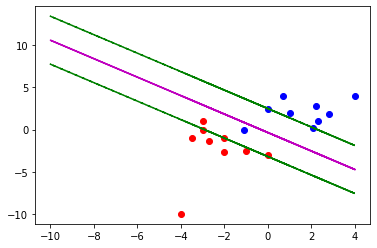

In [42]:
# Write your code here for C= 0.1
w,sv,b=soft_margine(X,y,0.1)
plot_margin(b,w,X)
plot_points(X, y)
plt.show()

[-1.73913043 -1.30434783] [5.33671311e-11 5.54918965e-11 5.26871361e-11 2.56503220e-10
 5.36513708e-11 5.65177381e-11 5.29174396e-11 5.53530210e-11
 1.48403298e-10 4.15992233e-11 5.25156192e-11 5.22950766e-11
 5.23197203e-11 5.23667846e-11 5.22973751e-11 5.23144143e-11
 5.20197633e-11 5.24289136e-11] -2.9130434782867254


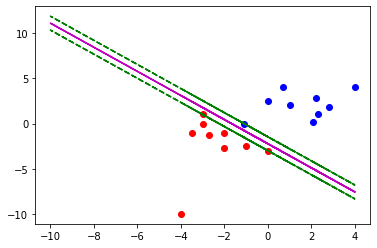

In [43]:
# Write your code here for C= 3
w,sv,b=soft_margine(X,y,3)
plot_margin(b,w,X)
plot_points(X, y)
plt.show()

[-1.73913043 -1.30434783] [-3.65786859e-12 -3.37334597e-12 -3.78688631e-12 -1.07888722e-12
 -3.62672357e-12 -3.36012153e-12 -3.97909088e-12 -3.49272448e-12
 -2.50262871e-12  2.60584154e-11 -3.35756645e-12 -3.44268912e-12
 -3.88905923e-12 -3.52442529e-12 -3.66476877e-12 -3.92636337e-12
 -4.31391442e-12 -3.93932287e-12] -2.913043478358501


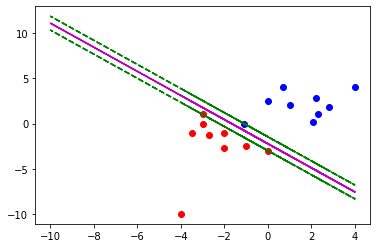

In [44]:
# Write your code here for C= 10
w,sv,b=soft_margine(X,y,10)
plot_margin(b,w,X)
plot_points(X, y)
plt.show()

[-1.73913044 -1.30434783] [-4.60392244e-13 -4.59711789e-13 -4.60636139e-13  2.21013708e-12
 -4.60271128e-13 -4.59151595e-13 -4.60568774e-13 -4.59892060e-13
  1.22703362e-12  3.91892028e-12 -4.60376242e-13 -4.60407606e-13
 -4.60744924e-13 -4.60446044e-13 -4.60551851e-13 -4.60735467e-13
 -4.60956788e-13 -4.60731333e-13] -2.9130434786828197


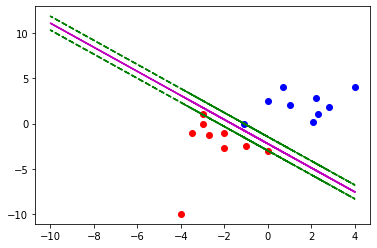

In [45]:
w,sv,b=soft_margine(X,y,100)
plot_margin(b,w,X)
plot_points(X, y)
plt.show()

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

The parameter C is used for  SVM optimization that how much you want to avoid misclassifying each training example. For large values of C like 100, the optimization will choose a smaller-margin hyperplane if that hyperplane works better for all training points. when the support vectors were acting as misclassification. when they were removed it resulted in larger hyperplane 


### Subsection 2

In [ ]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-03-11 15:18:13--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  29.6KB/s    in 5m 5s   

2021-03-11 15:23:17 (31.8 KB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-03-11 15:23:18--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/train-labels-idx1-ubyte.gz’

train-labe

In [ ]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
lbl=[0,1,2]
images_train = np.array(images)
labels_train = np.array(labels)
XTr,XTs=[],[]
YTr,YTs=[],[]
for i in range(60000):
  if labels_train[i] in lbl:
    XTr.append(images_train[i])
    YTr.append(labels_train[i])
images_train=np.array(XTr)
labels_train=np.array(YTr)
print(images_train.shape)
print(labels_train.shape)

(18623, 784)
(18623,)


In [ ]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)
for i in range(10000):
  if labels_test[i] in lbl:
    XTs.append(images_test[i])
    YTs.append(labels_test[i])
images_test=np.array(XTs)
labels_test=np.array(YTs)
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)

(18623, 784)
(18623,)
(3147, 784)
(3147,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(images_train, labels_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.svm import SVC
svclassifier2 = SVC(kernel='rbf')
svclassifier2.fit(images_train, labels_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.svm import SVC
svclassifier3 = SVC(kernel='poly')
svclassifier3.fit(images_train, labels_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.svm import SVC
svclassifier4 = SVC(kernel='sigmoid')
svclassifier4.fit(images_train, labels_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:

y_pred=svclassifier.predict(images_test)
print("Confusion Matrix\n",confusion_matrix(labels_test, y_pred))
print("\nClassification Report\n",classification_report(labels_test, y_pred))

Confusion Matrix
 [[ 971    0    9]
 [   1 1127    7]
 [  24   19  989]]

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032

    accuracy                           0.98      3147
   macro avg       0.98      0.98      0.98      3147
weighted avg       0.98      0.98      0.98      3147



In [ ]:
y_pred2=svclassifier2.predict(images_test)
print("Confusion Matrix\n",confusion_matrix(labels_test, y_pred2))
print("\nClassification Report\n",classification_report(labels_test, y_pred2))

Confusion Matrix
 [[ 979    0    1]
 [   0 1131    4]
 [   8    1 1023]]

Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032

    accuracy                           1.00      3147
   macro avg       1.00      1.00      1.00      3147
weighted avg       1.00      1.00      1.00      3147



In [ ]:
y_pred3=svclassifier3.predict(images_test)
print("Confusion Matrix\n",confusion_matrix(labels_test, y_pred3))
print("\nClassification Report\n",classification_report(labels_test, y_pred3))

Confusion Matrix
 [[ 975    2    3]
 [   0 1132    3]
 [   7    4 1021]]

Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147



In [ ]:
y_pred4=svclassifier4.predict(images_test)
print("Confusion Matrix\n",confusion_matrix(labels_test, y_pred4))
print("\nClassification Report\n",classification_report(labels_test, y_pred4))

Confusion Matrix
 [[ 938    1   41]
 [   0 1110   25]
 [  46   43  943]]

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.91      0.92      1032

    accuracy                           0.95      3147
   macro avg       0.95      0.95      0.95      3147
weighted avg       0.95      0.95      0.95      3147



In [ ]:
from sklearn.svm import SVC
C = [0.01,0.1,10,100]
for idx,c in enumerate(C):
  svclassifier1 = SVC(kernel='linear',C = c)
  svclassifier1.fit(images_train, labels_train)
  y_pred=svclassifier1.predict(images_test)
  print("For Linear kernel at C =",c)
  print("Confusion Matrix\n",confusion_matrix(labels_test, y_pred)) 
  print("\nClassification Report\n",classification_report(labels_test, y_pred))  

For Linear kernel at C = 0.01
Confusion Matrix
 [[ 971    0    9]
 [   1 1127    7]
 [  24   19  989]]

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032

    accuracy                           0.98      3147
   macro avg       0.98      0.98      0.98      3147
weighted avg       0.98      0.98      0.98      3147

For Linear kernel at C = 0.1
Confusion Matrix
 [[ 971    0    9]
 [   1 1127    7]
 [  24   19  989]]

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032

    accuracy                           0.98      3147
   macro avg       0.98      0.98      0.98      3147
weighted avg       0.98      0.98      0

In [ ]:
from sklearn.svm import SVC
C = [0.01,0.1,10,100,1,2,3]
for idx,c in enumerate(C):
  svclassifier1 = SVC(kernel='rbf',C = c,gamma=c)
  svclassifier1.fit(images_train, labels_train)
  y_pred=svclassifier1.predict(images_test)
  print("For Linear kernel at C =",c)
  print("Confusion Matrix\n",confusion_matrix(labels_test, y_pred)) 
  print("\nClassification Report\n",classification_report(labels_test, y_pred))

For Linear kernel at C = 0.01
Confusion Matrix
 [[   0  980    0]
 [   0 1135    0]
 [   0 1032    0]]

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.36      1.00      0.53      1135
           2       0.00      0.00      0.00      1032

    accuracy                           0.36      3147
   macro avg       0.12      0.33      0.18      3147
weighted avg       0.13      0.36      0.19      3147



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For Linear kernel at C = 0.1
Confusion Matrix
 [[   0  980    0]
 [   0 1135    0]
 [   0 1032    0]]

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.36      1.00      0.53      1135
           2       0.00      0.00      0.00      1032

    accuracy                           0.36      3147
   macro avg       0.12      0.33      0.18      3147
weighted avg       0.13      0.36      0.19      3147



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
